In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..', 'pplSIT', 'workflow'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..', 'pplSIT', 'workflow', 'utils'))

In [2]:
%matplotlib inline

import os
import h5py
import json
import numpy as np
import matplotlib.pyplot as plt

from utils.neurosuite import get_unit_names_sorted

In [10]:
#source  = '/Users/andrey/nevermind/AG_Pecka/data/processed/'
source  = '/home/sobolev/nevermind/AG_Pecka/data/processed/'
session = '013608_ppcSIT_2025-01-16_09-49-21'

animal      = session.split('_')[0]
meta_file   = os.path.join(source, animal, session, 'meta.h5')
units_file  = os.path.join(source, animal, session, 'units.h5')
probe_file  = os.path.join(source, animal, session, 'kilosort', 'probe.json')

In [12]:
# reading events and spiking data
with h5py.File(meta_file, 'r') as f:
    tl = np.array(f['processed']['timeline'])
    sound_events = np.array(f['processed']['sound_events'])
    cfg = json.loads(f['processed'].attrs['parameters'])
    tgt_mx = np.array(f['processed']['target_matrix'])

spike_times = {}
anat_pos = {}
with h5py.File(units_file, 'r') as f:
    unit_names = get_unit_names_sorted([name for name in f])
    for unit_name in f:
        spike_times[unit_name] = np.array(f[unit_name]['spike_times'])
        anat_pos[unit_name] = np.array(f[unit_name]['anatomical_position'])
        
with open(probe_file, 'r') as f:
    probe = json.loads(f.read())

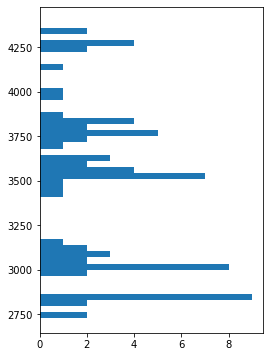

In [27]:
depths = np.array(probe['yc'])
y_poss = np.array(list(anat_pos.values()))[:, 1]
bins = np.linspace(depths.min(), depths.max(), 50)

fig, ax = plt.subplots(1, 1, figsize=(4, 6))
_ = ax.hist(y_poss, bins=bins, orientation="horizontal")
#ax.set_ylim()